<a href="https://colab.research.google.com/github/magickoo/Tensorflow-Deep-Learning/blob/main/1a_Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing on Medical Cost Dataset**

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

In [2]:
#import dependencies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Read the data
data= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Turn all categories into number
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
#split data into features(x) and labels(y)
X= data_one_hot.drop("charges",axis=1)
y= data_one_hot["charges"]

In [7]:
#view features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
#labels
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [10]:
#Set a random seed
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model

insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9416.8877 - mae: 9416.8877
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.9307 - mae: 7884.9307
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7560.5361 - mae: 7560.5361
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7679.2339 - mae: 7679.2339
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7814.2026 - mae: 7814.2026
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7532.7085 - mae: 7532.7085
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7579.7661 - mae: 7579.7661
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7733.0283 - mae: 7733.0283
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7427.5566 - mae: 7427.5566
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7701.5918 - mae: 7701.5918

In [11]:
# 2nd model ->Increased to 3 layers with 100,10,1 units,,,optimizer->Adam
#Set a random seed
tf.random.set_seed(42)

# Create the model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model

history=insurance_model2.fit(X_train,y_train,epochs=100,verbose=0)

In [12]:
insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4773.1997 - mae: 4773.1997


[4773.19970703125, 4773.19970703125]

Text(0.5, 0, 'epochs')

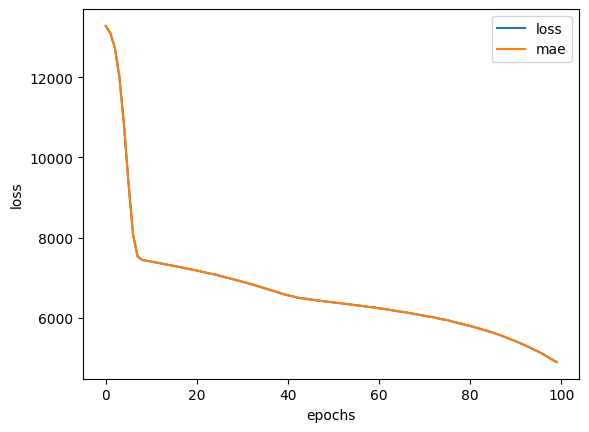

In [13]:
# Plot history(loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [18]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model2.fit(X_train, y_train, epochs=200, verbose=0)

In [19]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3158.7144 - mae: 3158.7144


(3158.71435546875, 3158.71435546875)

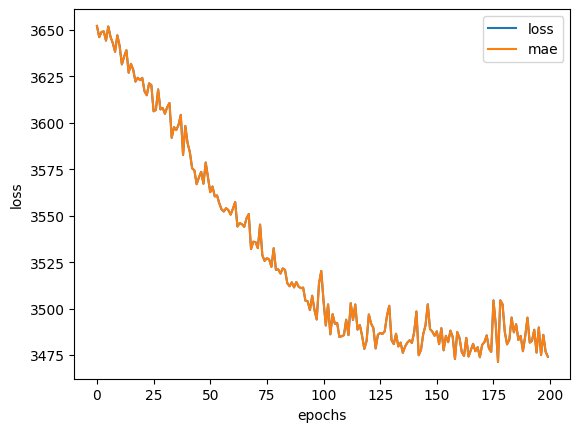

In [20]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

Processing Data

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**make_column_transformer** - build a multi-step data preprocessing function for the folllowing transformations:

**MinMaxScaler** - make sure all numerical columns are normalized (between 0 and 1).

**OneHotEncoder** - one hot encode the non-numerical columns.

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X and y

X= data.drop("charges",axis=1)
y=data["charges"]


X_train,X_test, y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [23]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [24]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train_normal.shape , X_train.shape

((1070, 11), (1070, 6))

In [27]:

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [29]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)


9/9 [==============================] - 2s 15ms/step - loss: 3168.0652 - mae: 3168.0652


In [30]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3158.71435546875, 3168.065185546875)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.